In [1]:
import os
import tensorflow as tf 
import numpy as np
import tensorflow.contrib.slim as slim
import matplotlib.pyplot as plt
from random import choice
from PIL import Image

In [2]:
# 数据集路径
dataset_dir = "./captcha/images/"
# 数据输入
inputs = tf.placeholder(tf.float32,[1,224,224,3])
# 分类数
num_classes = 10

In [3]:
# 获取所有验证码图片路径
def get_filenames(dataset_dir):
    photo_filenames = []
    for filename in os.listdir(dataset_dir):
        # 获取文件路径
        path = os.path.join(dataset_dir, filename)
        photo_filenames.append(path)
    return photo_filenames

In [4]:
# 获取图片路径
photo_filenames = get_filenames(dataset_dir)

In [5]:
def alexnet(inputs, is_training=True):
    with slim.arg_scope([slim.conv2d, slim.fully_connected],
                         activation_fn=tf.nn.relu,
                         weights_initializer=tf.glorot_uniform_initializer(),
                         biases_initializer=tf.constant_initializer(0)):
        
        net = slim.conv2d(inputs, 64, [11, 11], 4)
        net = slim.max_pool2d(net, [3, 3])
        net = slim.conv2d(net, 192, [5, 5])
        net = slim.max_pool2d(net, [3, 3])
        net = slim.conv2d(net, 384, [3, 3])
        net = slim.conv2d(net, 384, [3, 3])
        net = slim.conv2d(net, 256, [3, 3])
        net = slim.max_pool2d(net, [3, 3])
        
        # 数据扁平化
        net = slim.flatten(net)
        net = slim.fully_connected(net, 1024)
        net = slim.dropout(net, is_training=is_training)
        
        net0 = slim.fully_connected(net, num_classes, activation_fn=tf.nn.softmax)
        net1 = slim.fully_connected(net, num_classes, activation_fn=tf.nn.softmax)
        net2 = slim.fully_connected(net, num_classes, activation_fn=tf.nn.softmax)
        net3 = slim.fully_connected(net, num_classes, activation_fn=tf.nn.softmax)

    return net0,net1,net2,net3

INFO:tensorflow:Restoring parameters from models/model.ckpt-100


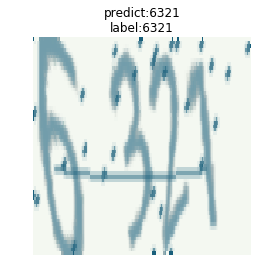

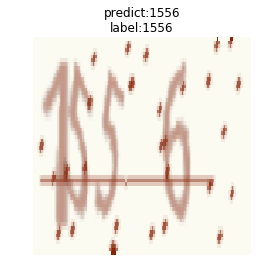

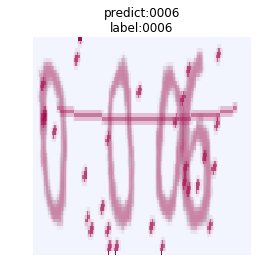

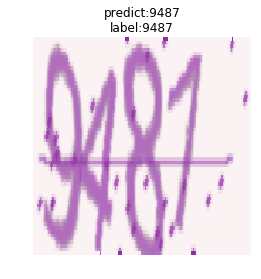

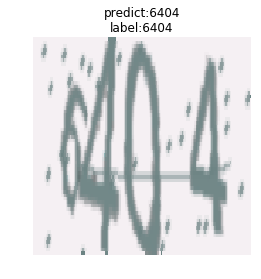

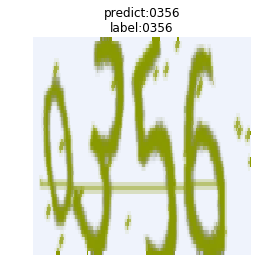

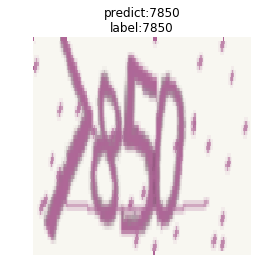

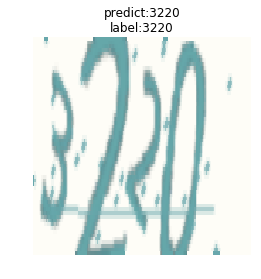

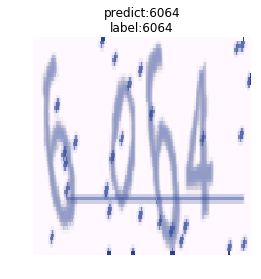

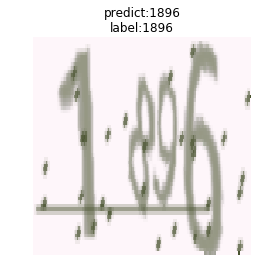

In [6]:
with tf.Session() as sess:

    # 传入数据得到结果
    logits0,logits1,logits2,logits3 = alexnet(inputs, False)
    
    # 预测值 
    predict0 = tf.argmax(logits0, 1)    
    predict1 = tf.argmax(logits1, 1)  
    predict2 = tf.argmax(logits2, 1)  
    predict3 = tf.argmax(logits3, 1)  
  
    # 所有变量初始化  
    sess.run(tf.global_variables_initializer()) 
    # 定义saver载入模型
    saver = tf.train.Saver()
    saver.restore(sess,'models/model.ckpt-100')
    
    for i in range(10):
        filename = choice(photo_filenames)
        # 读取图片
        image = Image.open(filename)  
        # 根据模型的结构resize
        image = image.resize((224, 224))
        image = np.array(image)
        # 图片预处理
        image_data = image/255.0
        image_data = image_data-0.5
        image_data = image_data*2
        # 变成4维数据
        image_data = image_data.reshape((1,224,224,3))
        # 获得预测结果
        pre0,pre1,pre2,pre3 = sess.run([predict0,predict1,predict2,predict3], feed_dict={inputs:image_data})
        # 数据标签
        label = filename.split('/')[-1][0:4]
        plt.imshow(image)
        plt.axis('off')
        plt.title('predict:'+ str(pre0[0])+str(pre1[0])+str(pre2[0])+str(pre3[0]) + '\n' + 'label:' + label)
        plt.show()